In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter as dfmt
from datetime import datetime
import struct 



In [2]:
f = open('202103061428.bin','rb')
s=f.read()
f.close()
numFloats=len(s)/4 
bins=256
floatsPerRow = bins
numRows=numFloats/floatsPerRow

rows = []
for j in range(int(numRows)):
    rows.append(struct.unpack(("%if" % floatsPerRow),
    			s[j*floatsPerRow*4:(j+1)*floatsPerRow*4]))

data = np.array(rows)
len(data)

4194

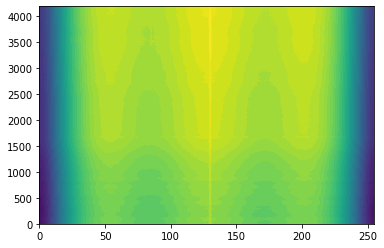

In [3]:
plt.contourf(data,50)

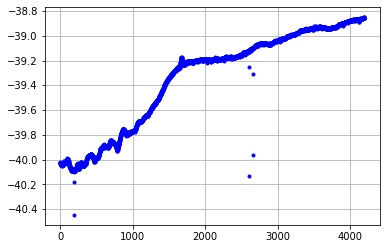

In [5]:
plt.plot(data[:,:].mean(axis=1),'b.')
plt.grid()

In [6]:
def getMeta(file):

    f=open(file + '.met','r')
    mets=f.readlines()
    f.close()
    metDict = {}
    for met in mets:
        val, key = [x.strip() for x in met.split("#")]
        if 'UTC' in val:
            metDict[key] = datetime.strptime(val, "%Y-%m-%d %H:%M:%S %Z")
        elif '.' in val:
            metDict[key] = float(val)
        else:
            metDict[key] = int(val)
            
    return metDict

def getRadioData(file):
    
    f = open(file + '.bin','rb')
    s=f.read()
    f.close()
    numFloats=len(s)/4 
    bins=256
    floatsPerRow = bins
    numRows=numFloats/floatsPerRow

    rows = []
    for j in range(int(numRows)):
        rows.append(struct.unpack(("%if" % floatsPerRow),
                    s[j*floatsPerRow*4:(j+1)*floatsPerRow*4]))

    return np.array(rows)

def buildDataFrame(file='', metDict=None, radioData=None):
    if metDict is None:
        if not file:
            raise RuntimeError("Ack. Without metadata, I need a file!")
        else:
            metDict = getMeta(file)
    if radioData is None:
        if not file:
            raise RuntimeError("Ack. Without radio data, I need a file!")
        else:
            radioData = getRadioData(file)
            
    startTime= metDict['firstAcqTimestamp UTC'].timestamp()
    endTime= metDict['lastAcqTimestamp UTC'].timestamp()
    times= np.linspace(startTime, endTime, len(radioData))
    tstamps= np.array([datetime.fromtimestamp(x) 
              for x in times])
    tseries= pd.Series(tstamps)
    return pd.DataFrame({'time':tseries, 'energy':radioData.mean(axis=1)})

df = buildDataFrame('202103061428')

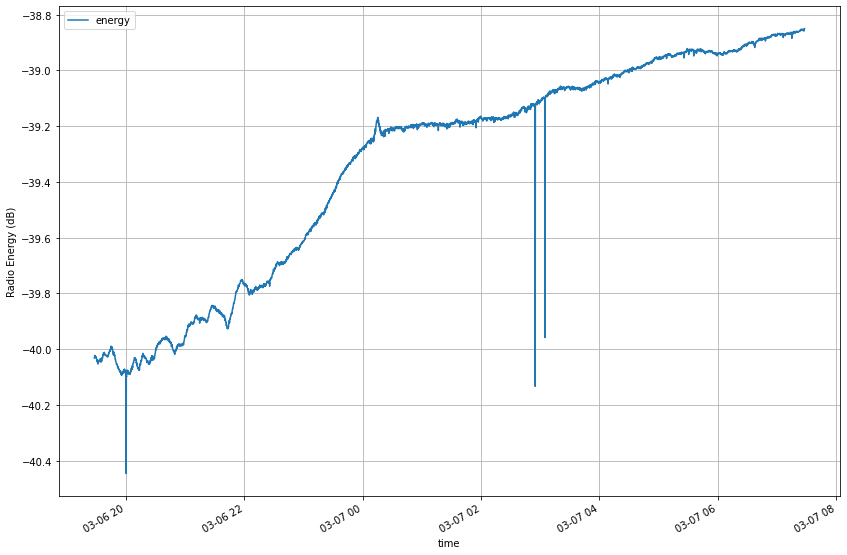

In [11]:
df.plot('time','energy',figsize=(14,10))
plt.ylabel('Radio Energy (dB)')
plt.grid()

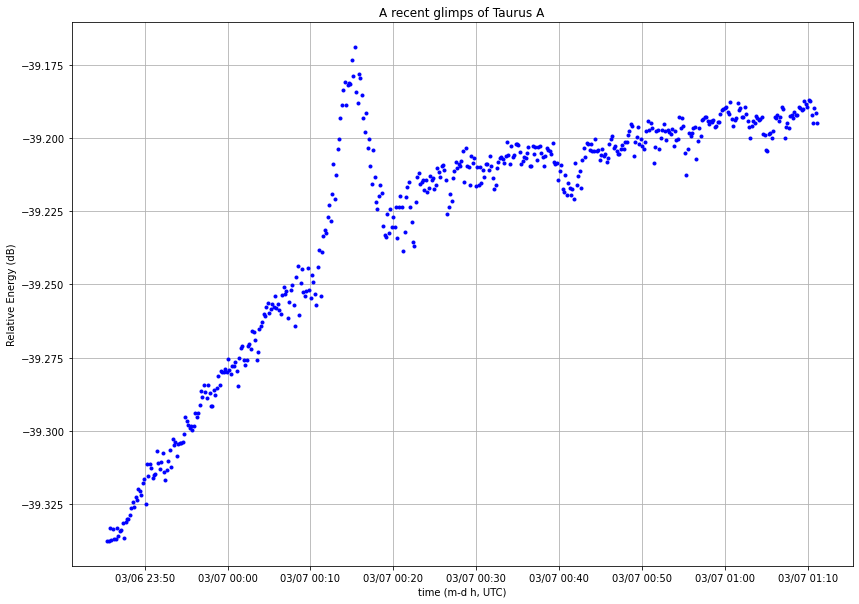

In [36]:
begin = 1500
end = 2000

fig = plt.figure(figsize=(14,10))
ax = plt.gca()

form_date = dfmt('%m/%d %H:%M')
ax.xaxis.set_major_formatter(form_date)

plt.xlabel('time (m-d h, UTC)')
plt.ylabel('Relative Energy (dB)')
plt.title('A recent glimps of Taurus A')
plt.grid()
plt.plot(df.time[begin:end], df.energy[begin:end],'b.')

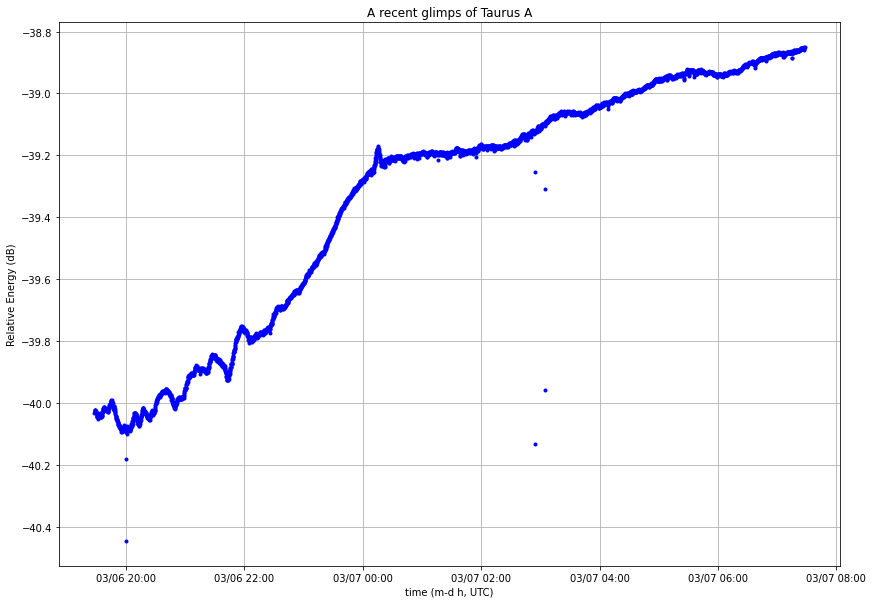

In [37]:
begin = 0
end = 4193

fig = plt.figure(figsize=(14,10))
ax = plt.gca()

form_date = dfmt('%m/%d %H:%M')
ax.xaxis.set_major_formatter(form_date)

plt.xlabel('time (m-d h, UTC)')
plt.ylabel('Relative Energy (dB)')
plt.title('A recent glimps of Taurus A')
plt.grid()
plt.plot(df.time[begin:end], df.energy[begin:end],'b.')